__Assignment - Week 4__

__Name__: Runze Li

__net id__: rl50xx

We use the SVM model to classify Dos vs. Non Dos classes with all features. We can summarize the following table using different kernels:

|Kernel (for all features)|Training Accuracy|Testing Accuracy|
|:--:|:--:|:--:|
|Linear|99.96%|99.92%|
|RBF|99.62%|99.70%|
|Polynomial|99.30%|99.48%|
|Sigmoid|99.57%|99.68%|

What's more, we summarize the pros and cons of each of the kernels:

- Linear Kernel:
    - __Pros:__ Linear kernel is computationally efficient, and it works well when the data is linearly separable.
    - __Cons:__ Linear kernel may be limited in handling non-linear data.

- RBF Kernel:
    - __Pros:__ RBF kernel is highly flexible and capable of capturing complex non-linear relationships in the data.
    - __Cons:__ RBF kernel is difficult to find a suitable gamma value which will lead to overfitting.
    
- Polynomial Kernel:
    - __Pros:__ Polynomial Kernel can capture non-linear and complex relationships in the data and it provides a flexible decision boundary by introducing higher-dimensional feature space through polynomial mappings.
    - __Cons:__ Polynomial kernel is sensitive to the choice of hyperparameters, such as the degree of the polynomial.

- Sigmoid Kernel:
    - __Pros:__ Sigmoid kernel can capture non-linear relationships and is suitable for data that is not linearly separable.
    - __Cons:__ Sigmoid kernel is less commonly used compared to other kernels like RBF and polynomial.

By selecting different features and conducting tests and drawings respectively, we select `service` and `count` as features for training in order to draw a clearer image. The result is as follows:

|Kernel (only for 2 features)|Training Accuracy|Testing Accuracy|
|:--:|:--:|:--:|
|Linear|98.17%|98.05%|
|RBF|98.18%|98.07%|

We can find that RBF kernel gets the better accuracy than linear kernel because the data isn't linearly seperable. The decision boundary is much more complex and captured more intricate relationship between the 2 features.

### Step1. Using the Scikit-Learn Library train the SVM model on the KDD99 data set to classify Dos vs Non Dos using all of the features at once.

In [1]:
# Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm

#### Load data

The Website of Kddcup99: [https://datahub.io/machine-learning/kddcup99](https://datahub.io/machine-learning/kddcup99)

In [2]:
# Load data
df = pd.read_csv('kddcup99_csv.csv')

# Display original data
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


#### Preprocessing

In the data, we found that some data are __object-type features__. For these features, we need to identify and use __LabelEncoder__ to encode, convert the type value to an integer value and return the corresponding column.

Note: You can use label encoder or one hot encoding for encoding categorical variables.

In [3]:
print("Feature data types:")
print(df.dtypes)

Feature data types:
duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
lnum_compromised                 int64
lroot_shell                      int64
lsu_attempted                    int64
lnum_root                        int64
lnum_file_creations              int64
lnum_shells                      int64
lnum_access_files                int64
lnum_outbound_cmds               int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_s

In the data, we found that __protocol_type, service and flag__ are object-type features. For these features, we convert these values to integer values.

In [4]:
from sklearn.preprocessing import LabelEncoder

objectFeatures = ['protocol_type', 'service', 'flag']
for feature in objectFeatures:
    labelEncoder = LabelEncoder()
    df[feature] = labelEncoder.fit_transform(df[feature])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


Dos class consists of __back dos, land dos, neptune dos, pod dos, smurf dos and teardrop dos__. Non Dos class consists of every other attack. We need to specify the probe class as 1 and others as 0.

In [5]:
# Dos class consists of back dos, land dos, neptune dos, pod dos, smurf dos and teardrop dos.
dos = ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop']

def find_dos(x):
    if x in dos:
        return 1
    else:
        return 0

In [6]:
df['label'] = df['label'].apply(find_dos)

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


#### Balance data

The dataset given is highly imbalanced and we will need to under sample the majority class to make the dataset balanced.

Note: The dataset given is highly imbalanced, you are required to under sample the majority class to make the dataset balanced( Refer: imblearn.under_sampling.RandomUnderSampler).

In [7]:
from imblearn.under_sampling import RandomUnderSampler
# randomUnderSampler = RandomUnderSampler(random_state=42, replacement=True)
randomUnderSampler = RandomUnderSampler(random_state=42, replacement=False)

In [8]:
from collections import Counter
y = df['label']
X = df.drop(columns=['label'])
print(Counter(y))

Counter({1: 391458, 0: 102562})


In [9]:
X, y = randomUnderSampler.fit_resample(X, y)
# print(X)
# print(y)
print(Counter(y))

print(X.shape[0])

Counter({0: 102562, 1: 102562})
205124


#### Split  data into train(80%) and test(20%) sets.

Note: It is recommended to take a smaller fraction of dataset as SVM is slower compared to other models. Scaling of the dataset could also help (Refer: sklearn.preprocessing.MinMaxScaler).

In [10]:
from sklearn.model_selection import train_test_split

# Scale down the data set ten times
_, X, _, y = train_test_split(X, y, test_size=0.1)
print(X.shape[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape[0])

20513
16410


In [11]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
X_train = minMaxScaler.fit_transform(X_train)
X_test = minMaxScaler.fit_transform(X_test)

### Step2. Run the SVM model (at least) four times using a different kernel each time using all the features.

- Compare the results for each of the kernels.
- Discuss the pros and cons of using each of the kernels that you've chosen.

In SVM, C is a regularization parameter. Its role is to balance the model's fit to the training data and the penalty for model complexity to prevent overfitting. Therefore, selecting an appropriate value for C is crucial, and it can be tuned through techniques.

We need to find out the training results obtained by using different C in different kernels. Set `C = [0.01, 0.1, 1, 10, 100, 1000]`. The resulting image is as follows:

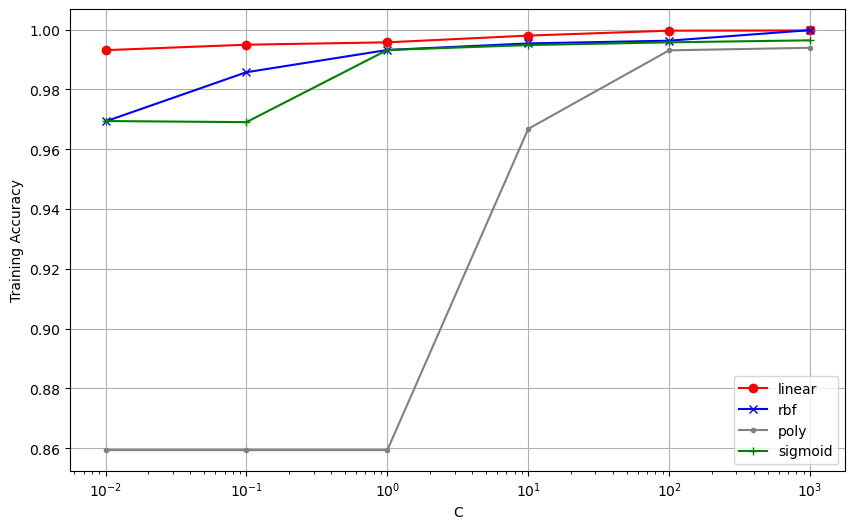

In [12]:
C = [0.01, 0.1, 1, 10, 100, 1000]
# C = [10, 100, 1000]
linear_train_accuracies = []
rbf_train_accuracies = []
poly_train_accuracies = []
sigmoid_train_accuracies = []

for c in C:
    svc_linear = svm.SVC(kernel="linear", C=c, gamma=.0073)
    svc_linear.fit(X_train, y_train)
    y_train_pred = svc_linear.predict(X_train)
    train_accuracy = np.mean(y_train_pred == y_train)
    linear_train_accuracies.append(train_accuracy)
#     print('Training accuracy:', train_accuracy)

    svc_rbf = svm.SVC(kernel="rbf", C=c, gamma=.0073)
    svc_rbf.fit(X_train, y_train)
    y_train_pred = svc_rbf.predict(X_train)
    train_accuracy = np.mean(y_train_pred == y_train)
    rbf_train_accuracies.append(train_accuracy)
    
    svc_poly = svm.SVC(kernel="poly", C=c, gamma=.0073)
    svc_poly.fit(X_train, y_train)
    y_train_pred = svc_poly.predict(X_train)
    train_accuracy = np.mean(y_train_pred == y_train)
    poly_train_accuracies.append(train_accuracy)
    
    svc_sigmoid = svm.SVC(kernel="sigmoid", C=c, gamma=.0073)
    svc_sigmoid.fit(X_train, y_train)
    y_train_pred = svc_sigmoid.predict(X_train)
    train_accuracy = np.mean(y_train_pred == y_train)
    sigmoid_train_accuracies.append(train_accuracy)

# Plot the train and test accuracies vs regularization strengths
plt.figure(figsize=(10, 6))
plt.plot(C, linear_train_accuracies, color='red', marker='o', label='linear')
plt.plot(C, rbf_train_accuracies, color='blue', marker='x', label='rbf')
plt.plot(C, poly_train_accuracies, color='grey', marker='.', label='poly')
plt.plot(C, sigmoid_train_accuracies, color='green', marker='+', label='sigmoid')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Training Accuracy')
plt.legend()
plt.grid(True)

We can see from the image that when `C = 100`, the training accuracy in the four kernels is basically at a relatively high level. Taking into account the potential problem of model overfitting if the C value is too high, we all use `C = 100` in subsequent training models and tests.

#### linear kernel

In [16]:
from sklearn import svm
svc_linear = svm.SVC(kernel="linear", C=100, gamma=.0073)
svc_linear.fit(X_train, y_train)

print("linear kernal:")
y_train_pred = svc_linear.predict(X_train)
train_accuracy = np.mean(y_train_pred == y_train)
print("Training accuracy:", train_accuracy)

y_test_pred = svc_linear.predict(X_test)
test_accuracy = np.mean(y_test_pred == y_test)
print("Testing accuracy:", test_accuracy)

linear kernal:
Training accuracy: 0.9996343692870201
Testing accuracy: 0.9992688276870583


#### rbf kernel

In [17]:
svc_rbf = svm.SVC(kernel="rbf", C=100, gamma=.0073)
svc_rbf.fit(X_train, y_train)

print("rbf kernal:")
y_train_pred = svc_rbf.predict(X_train)
train_accuracy = np.mean(y_train_pred == y_train)
print("Training accuracy:", train_accuracy)

y_test_pred = svc_rbf.predict(X_test)
test_accuracy = np.mean(y_test_pred == y_test)
print("Testing accuracy:", test_accuracy)

rbf kernal:
Training accuracy: 0.9962827544180378
Testing accuracy: 0.997075310748233


#### poly kernel

In [18]:
svc_poly = svm.SVC(kernel="poly", C=100, gamma=.0073)
svc_poly.fit(X_train, y_train)

print("poly kernal:")
y_train_pred = svc_poly.predict(X_train)
train_accuracy = np.mean(y_train_pred == y_train)
print("Training accuracy:", train_accuracy)

y_test_pred = svc_poly.predict(X_test)
test_accuracy = np.mean(y_test_pred == y_test)
print("Testing accuracy:", test_accuracy)

poly kernal:
Training accuracy: 0.9930530164533821
Testing accuracy: 0.9948817938094078


#### sigmoid kernel

In [19]:
svc_sigmoid = svm.SVC(kernel="sigmoid", C=100, gamma=.0073)
svc_sigmoid.fit(X_train, y_train)

print("sigmoid kernal:")
y_train_pred = svc_sigmoid.predict(X_train)
train_accuracy = np.mean(y_train_pred == y_train)
print("Training accuracy:", train_accuracy)

y_test_pred = svc_sigmoid.predict(X_test)
test_accuracy = np.mean(y_test_pred == y_test)
print("Testing accuracy:", test_accuracy)

sigmoid kernal:
Training accuracy: 0.9957343083485679
Testing accuracy: 0.9968315866439191


#### Discuss the pros and cons of using each of the kernels that you've chosen.

##### Linear Kernel:

- __Pros:__ Linear kernel is computationally efficient, and it works well when the data is linearly separable.
- __Cons:__ Linear kernel may be limited in handling non-linear data.

##### RBF Kernel:

- __Pros:__ RBF kernel is highly flexible and capable of capturing complex non-linear relationships in the data.
- __Cons:__ RBF kernel is difficult to find a suitable gamma value which will lead to overfitting.
    
##### Polynomial Kernel:

- __Pros:__ Polynomial Kernel can capture non-linear and complex relationships in the data and it provides a flexible decision boundary by introducing higher-dimensional feature space through polynomial mappings.
- __Cons:__ Polynomial kernel is sensitive to the choice of hyperparameters, such as the degree of the polynomial.

##### Sigmoid Kernel:

- __Pros:__ Sigmoid kernel can capture non-linear relationships and is suitable for data that is not linearly separable.
- __Cons:__ Sigmoid kernel is less commonly used compared to other kernels like RBF and polynomial.

### Step3. Pick two features which you think are important for this problem. 

Train SVM model using only those two features and visualize the decision boundary. Do this for linear kernel and RBF kernel only. 

You may want to subsample the training data substantially in order to get a good visualization within a reasonable time. 

Discuss your observations.

We use the `RandomForestClassifier` for feature selection. Through the feature importance score calculated by the model, we can get the top-10 features we think are the most important and return the name of the feature.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

clf = RandomForestClassifier()
clf = clf.fit(X, y)

feature_importances = clf.feature_importances_
# print("Feature Importances:", feature_importances)

model = SelectFromModel(clf, max_features=10, prefit=True)
X_new = model.transform(X)

selected_features_index = model.get_support()
selected_features_names = [feature for idx, feature in enumerate(X.columns) if selected_features_index[idx]]
print("Selected Features:", selected_features_names)

Selected Features: ['protocol_type', 'service', 'src_bytes', 'dst_bytes', 'logged_in', 'count', 'srv_count', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_diff_host_rate']


D:\Lirz3\anaconda3\envs\csgy6923\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


By selecting 10 features and conducting tests and drawings respectively, we can see that when `service` and `count` are selected as features for training, the distribution of model data is more even than when selecting other features. In this case, we can draw a clearer image.

In [21]:
# selected_features = ['protocol_type', 'count']
selected_features = ['service', 'count']
# selected_features = ['dst_bytes', 'count']
# selected_features = ['src_bytes', 'count']
# selected_features = ['logged_in', 'count']
# selected_features = ['srv_count', 'count']
# selected_features = ['diff_srv_rate', 'count']
# selected_features = ['dst_host_count', 'count']
# selected_features = ['dst_host_same_src_port_rate', 'count']
X_2features = X[selected_features]
print(X_2features)
# print(y)

        service  count
256159       14    511
32342        22      2
449857       45      1
2587         22      9
454355       40      1
...         ...    ...
269526       14    511
244184       14    511
434889       14    511
451108       40      3
104201       22      9

[20513 rows x 2 columns]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_2features, y, test_size=0.2, random_state=42)
X_train = minMaxScaler.fit_transform(X_train)
X_test = minMaxScaler.fit_transform(X_test)

#### linear kernel

In [23]:
svc_linear = svm.SVC(kernel="linear", C=100, gamma=.0073)
svc_linear.fit(X_train, y_train)

print("linear kernal:")
y_train_pred = svc_linear.predict(X_train)
train_accuracy = np.mean(y_train_pred == y_train)
print("Training accuracy:", train_accuracy)

y_test_pred = svc_linear.predict(X_test)
test_accuracy = np.mean(y_test_pred == y_test)
print("Testing accuracy:", test_accuracy)

linear kernal:
Training accuracy: 0.9817184643510055
Testing accuracy: 0.9805020716548867


C:\Users\Lirz3\AppData\Local\Temp\ipykernel_10684\3416214299.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter1 = plt.scatter([], [], c='red', label='Dos', cmap=plt.cm.RdBu)
C:\Users\Lirz3\AppData\Local\Temp\ipykernel_10684\3416214299.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter2 = plt.scatter([], [], c='blue', label='Non Dos', cmap=plt.cm.RdBu)


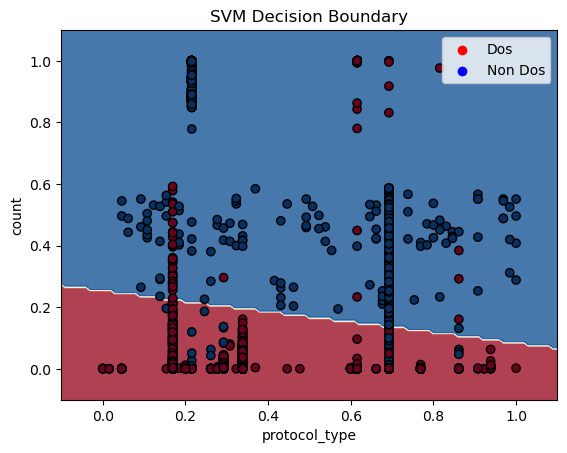

In [24]:
x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = svc_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
scatter1 = plt.scatter([], [], c='red', label='Dos', cmap=plt.cm.RdBu)
scatter2 = plt.scatter([], [], c='blue', label='Non Dos', cmap=plt.cm.RdBu)
plt.legend(handles=[scatter1, scatter2], loc='upper right')

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

# Plot the data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolors='k')

plt.xlabel('protocol_type')
plt.ylabel('count')
plt.title('SVM Decision Boundary')
plt.legend()
plt.show()

#### rbf kernel

In [25]:
svc_rbf = svm.SVC(kernel="rbf", C=100, gamma=.0073)
svc_rbf.fit(X_train, y_train)

print("rbf kernal:")
y_train_pred = svc_rbf.predict(X_train)
train_accuracy = np.mean(y_train_pred == y_train)
print("Training accuracy:", train_accuracy)

y_test_pred = svc_rbf.predict(X_test)
test_accuracy = np.mean(y_test_pred == y_test)
print("Testing accuracy:", test_accuracy)

rbf kernal:
Training accuracy: 0.9818403412553321
Testing accuracy: 0.9807457957592006


C:\Users\Lirz3\AppData\Local\Temp\ipykernel_10684\2018232709.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter1 = plt.scatter([], [], c='red', label='Dos', cmap=plt.cm.RdBu)
C:\Users\Lirz3\AppData\Local\Temp\ipykernel_10684\2018232709.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter2 = plt.scatter([], [], c='blue', label='Non Dos', cmap=plt.cm.RdBu)


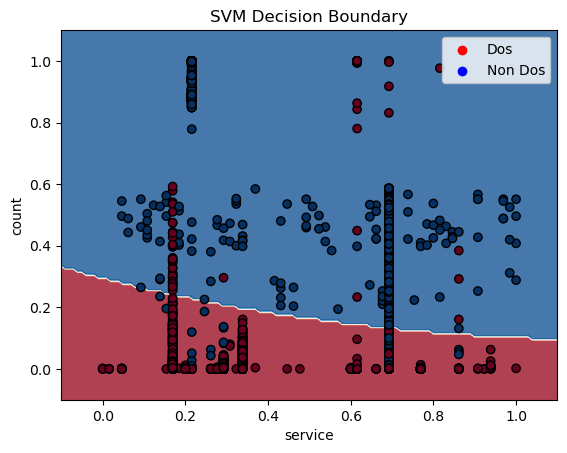

In [28]:
x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
scatter1 = plt.scatter([], [], c='red', label='Dos', cmap=plt.cm.RdBu)
scatter2 = plt.scatter([], [], c='blue', label='Non Dos', cmap=plt.cm.RdBu)
plt.legend(handles=[scatter1, scatter2], loc='upper right')

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

# Plot the data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolors='k')

plt.xlabel('service')
plt.ylabel('count')
plt.title('SVM Decision Boundary')
plt.legend()
plt.show()

From the two pictures and the results obtained, we can see that both kernels have obtained considerable results, and the data of Dos and Non Dos are basically separated.

RBF kernel gets the better accuracy than linear kernel because the data isn't linearly seperable. In RBF kernel, we can find that the decision boundary is much more complex and captured more intricate relationship between the 2 features.